In [1]:
%load_ext autoreload
%autoreload 2
import os
import sys
import time
import numpy as np
from Shapley2 import ShapNN
from DSap1 import DShap
import matplotlib.pyplot as plt
import sklearn
from shap_utils import *
%matplotlib inline
MEM_DIR = './'

In [5]:
pip install scikit-learn

   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB 1.3 MB/s eta 0:00:09
   ---------------------------------------- 0.1/11.0 MB 1.3 MB/s eta 0:00:09
    --------------------------------------- 0.2/11.0 MB 1.6 MB/s eta 0:00:07
    --------------------------------------- 0.2/11.0 MB 1.6 MB/s eta 0:00:07
    --------------------------------------- 0.2/11.0 MB 807.1 kB/s eta 0:00:14
    --------------------------------------- 0.2/11.0 MB 841.6 kB/s eta 0:00:13
    --------------------------------------- 0.2/11.0 MB 841.6 kB/s eta 0:00:13
    --------------------------------------- 0.2/11.0 MB 765.3 kB/s eta 0:00:15
   - -------------------------------------- 0.3/11.0 MB 741.6 kB/s eta 0:00:15
   - -------------------------------------- 0.3/11.0 MB 741.6 kB/s eta 0:00:15
   - -------------------------------------- 0.3/11.0 MB 741.6 kB/s eta 0:00:15
   - -------------------------------------- 0.3/11.0 MB 655.5 kB/s et

In [1]:
pip install tensorflow



     ---------------------------------------- 0.0/46.2 kB ? eta -:--:--
     -------------------------------------- 46.2/46.2 kB 765.3 kB/s eta 0:00:00
   ---------------------------------------- 0.0/377.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/377.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/377.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/377.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/377.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/377.0 MB ? eta -:--:--
   ---------------------------------------- 0.2/377.0 MB 807.1 kB/s eta 0:07:47
   ---------------------------------------- 0.2/377.0 MB 807.1 kB/s eta 0:07:47
   ---------------------------------------- 0.2/377.0 MB 807.1 kB/s eta 0:07:47
   ---------------------------------------- 0.2/377.0 MB 761.1 kB/s eta 0:08:15
   ---------------------------------------- 0.2/377.0 MB 761.1 kB/s eta 0:08:15
   ------------------

Let's have a calssification problem and use the a losigitic regression model for a small data set of size 100.

In [2]:
problem, model = 'classification', 'logistic'
hidden_units = [] # Empty list in the case of logistic regression.
train_size = 100

## Create Synthetic Dataset

Let's create a synthetic data set with input-output $y = Bernouli(f(x))$ where $f$ is a polynomial of oder 'difficulty' and $x \in \mathscr{R}^d$. ('important_dims' determines the number of $d$ dimensions in $x$ that are non-null)

In [3]:
d, difficulty = 50, 1
num_classes = 2
tol = 0.03
target_accuracy = 0.7
important_dims = 5
clf = return_model(model, solver='liblinear', hidden_units=tuple(hidden_units))
_param = 1.0
for _ in range(100):
    X_raw = np.random.multivariate_normal(mean=np.zeros(d), cov = np.eye(d), 
                                          size=train_size + 5000)
    _, y_raw, _, _ = label_generator(
        problem, X_raw, param = _param,  difficulty = difficulty, important=important_dims)
    clf.fit(X_raw[:train_size], y_raw[:train_size])
    test_acc = clf.score(X_raw[train_size:], y_raw[train_size:])
    if test_acc > target_accuracy:                                                         
        break
    _param *= 1.1
print('Performance using the whole training set = {0:.2f}'.format(test_acc))

Performance using the whole training set = 0.76


## Running

Now let's create the instance that takes cares of computing all the algorithms for the data set. Here we run it several times one-after-another, but in a real-world scenario they could be run in parallel. 

In [4]:
X, y = X_raw[:100], y_raw[:100]
X_test, y_test = X_raw[100:], y_raw[100:]
model = 'logistic'
problem = 'classification'
num_test = 1000
directory = './temp'
dshap = DShap(X, y, X_test, y_test, num_test, model_family=model, metric='accuracy',
              directory=directory, seed=1)
dshap.run(100, 0.1)

1
LOO values calculated! True
sources LOO: {0: array([0]), 1: array([1]), 2: array([2]), 3: array([3]), 4: array([4]), 5: array([5]), 6: array([6]), 7: array([7]), 8: array([8]), 9: array([9]), 10: array([10]), 11: array([11]), 12: array([12]), 13: array([13]), 14: array([14]), 15: array([15]), 16: array([16]), 17: array([17]), 18: array([18]), 19: array([19]), 20: array([20]), 21: array([21]), 22: array([22]), 23: array([23]), 24: array([24]), 25: array([25]), 26: array([26]), 27: array([27]), 28: array([28]), 29: array([29]), 30: array([30]), 31: array([31]), 32: array([32]), 33: array([33]), 34: array([34]), 35: array([35]), 36: array([36]), 37: array([37]), 38: array([38]), 39: array([39]), 40: array([40]), 41: array([41]), 42: array([42]), 43: array([43]), 44: array([44]), 45: array([45]), 46: array([46]), 47: array([47]), 48: array([48]), 49: array([49]), 50: array([50]), 51: array([51]), 52: array([52]), 53: array([53]), 54: array([54]), 55: array([55]), 56: array([56]), 57: arr

KeyboardInterrupt: 

In [4]:
X, y = X_raw[:100], y_raw[:100]
X_test, y_test = X_raw[100:], y_raw[100:]
print(X.shape, y.shape)
print(X_test.shape, y_test.shape)

(100, 50) (100,)
(5000, 50) (5000,)


In [8]:
model = 'logistic'
problem = 'classification'
num_test = 1000
directory = './temp'
dshap = DShap(X, y, X_test, y_test, num_test, model_family=model, metric='accuracy',
              directory=directory, seed=1)
dshap.run(100, 0.1)

d:\DataShapley\DSap1.py:60: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if self.model_family is 'logistic':


1
LOO values calculated! True
sources LOO: {0: array([0]), 1: array([1]), 2: array([2]), 3: array([3]), 4: array([4]), 5: array([5]), 6: array([6]), 7: array([7]), 8: array([8]), 9: array([9]), 10: array([10]), 11: array([11]), 12: array([12]), 13: array([13]), 14: array([14]), 15: array([15]), 16: array([16]), 17: array([17]), 18: array([18]), 19: array([19]), 20: array([20]), 21: array([21]), 22: array([22]), 23: array([23]), 24: array([24]), 25: array([25]), 26: array([26]), 27: array([27]), 28: array([28]), 29: array([29]), 30: array([30]), 31: array([31]), 32: array([32]), 33: array([33]), 34: array([34]), 35: array([35]), 36: array([36]), 37: array([37]), 38: array([38]), 39: array([39]), 40: array([40]), 41: array([41]), 42: array([42]), 43: array([43]), 44: array([44]), 45: array([45]), 46: array([46]), 47: array([47]), 48: array([48]), 49: array([49]), 50: array([50]), 51: array([51]), 52: array([52]), 53: array([53]), 54: array([54]), 55: array([55]), 56: array([56]), 57: arr

Now we merge results for the parallel runs:

In [10]:
dshap.merge_results()

./temp\mem_tmc_0000.pkl
./temp\mem_tmc_0001.pkl
./temp\mem_tmc_0002.pkl
./temp\mem_tmc_0003.pkl
./temp\mem_tmc_0004.pkl
./temp\mem_tmc_0005.pkl
./temp\mem_tmc_0006.pkl
./temp\mem_tmc_0007.pkl
./temp\mem_tmc_0008.pkl
./temp\mem_tmc_0009.pkl
./temp\mem_tmc_0010.pkl
./temp\mem_tmc_0011.pkl
./temp\mem_tmc_0012.pkl
./temp\mem_tmc_0013.pkl
./temp\mem_tmc_0014.pkl
./temp\mem_tmc_0015.pkl
./temp\mem_tmc_0016.pkl
./temp\mem_tmc_0017.pkl
./temp\mem_tmc_0018.pkl
./temp\mem_tmc_0019.pkl
./temp\mem_tmc_0020.pkl
./temp\mem_g_0000.pkl
./temp\mem_g_0001.pkl
./temp\mem_g_0002.pkl
./temp\mem_g_0003.pkl
./temp\mem_g_0004.pkl
./temp\mem_g_0005.pkl
./temp\mem_g_0006.pkl
./temp\mem_g_0007.pkl
./temp\mem_g_0008.pkl
./temp\mem_g_0009.pkl
./temp\mem_g_0010.pkl
./temp\mem_g_0011.pkl
./temp\mem_g_0012.pkl
./temp\mem_g_0013.pkl
./temp\mem_g_0014.pkl
./temp\mem_g_0015.pkl
./temp\mem_g_0016.pkl
./temp\mem_g_0017.pkl
./temp\mem_g_0018.pkl
./temp\mem_g_0019.pkl
./temp\mem_g_0020.pkl


Let's look at the convergence plots of the algorithms.

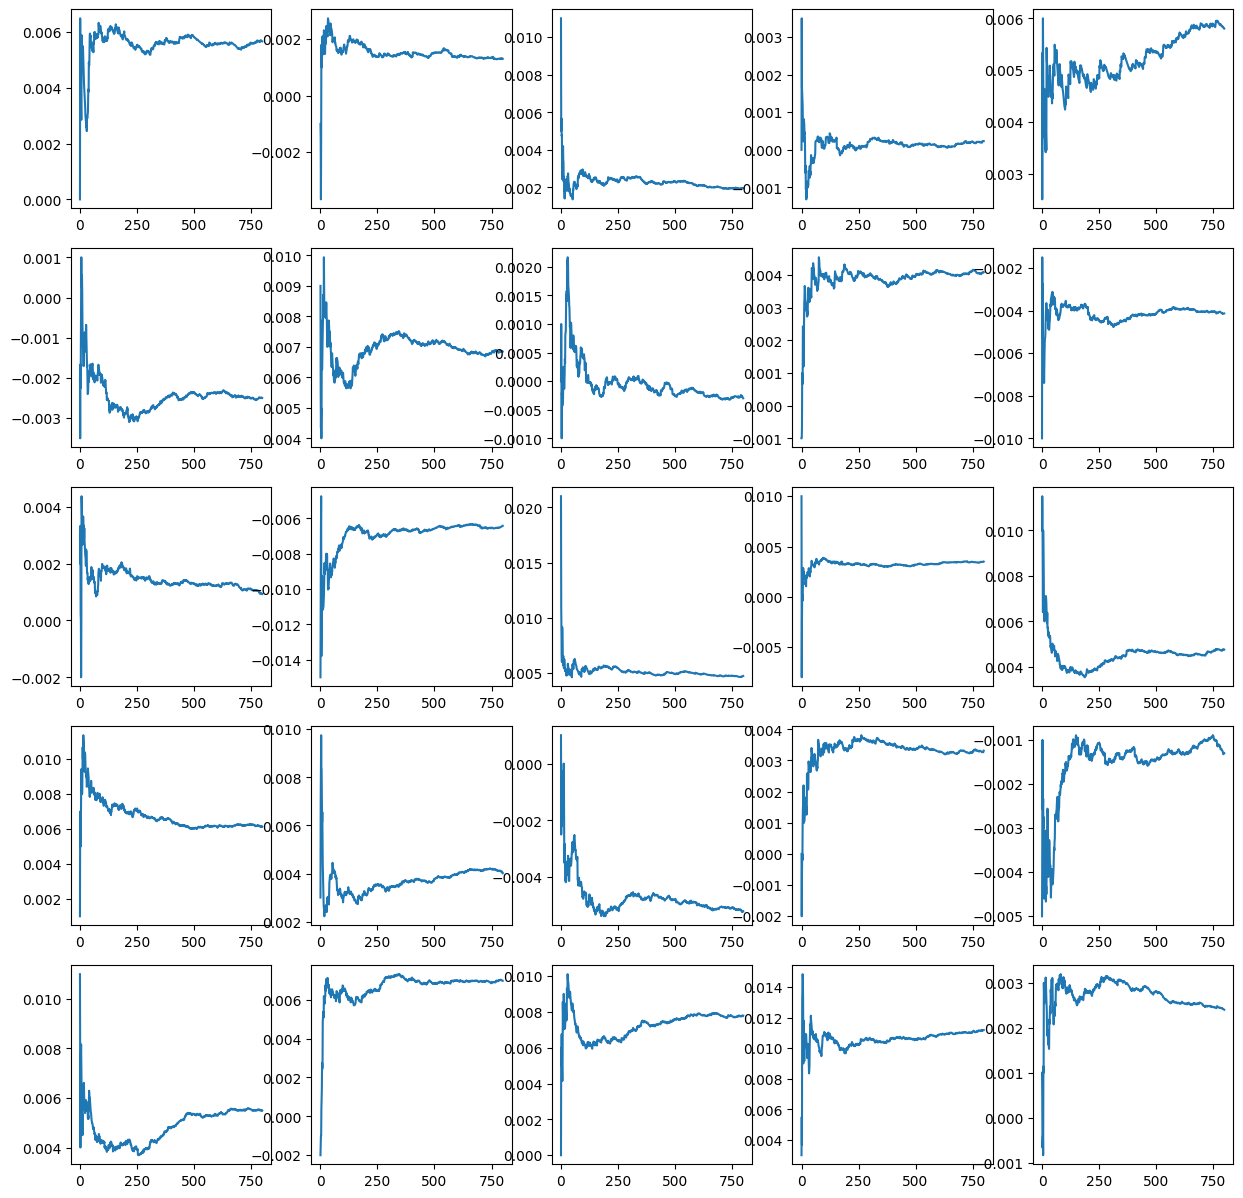

In [15]:
convergence_plots(dshap.marginals_tmc)

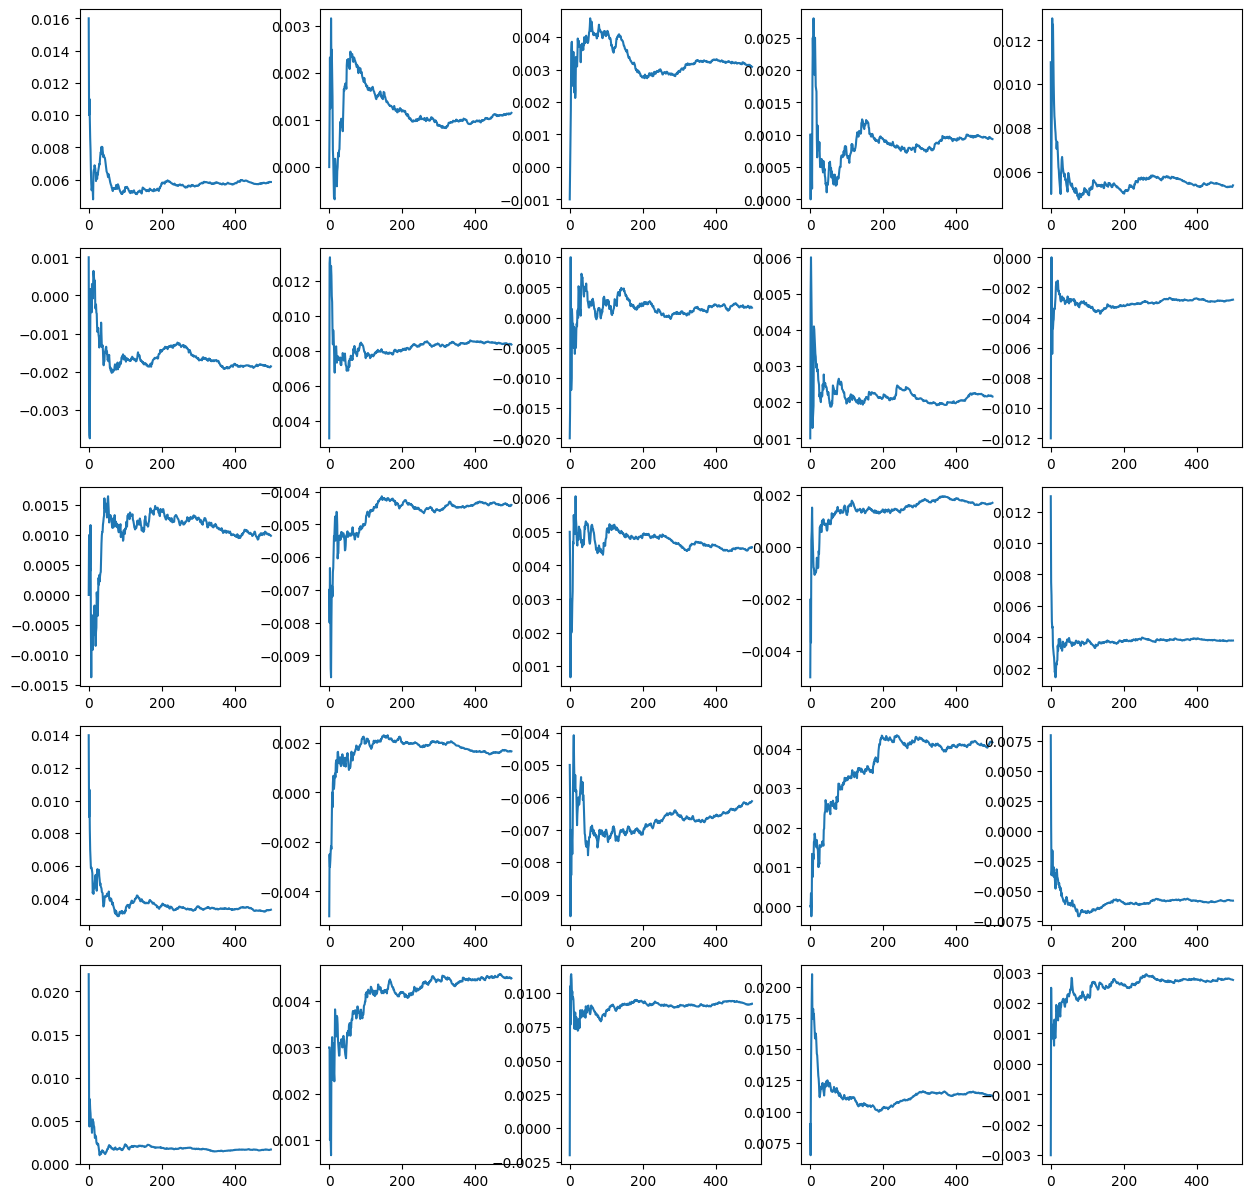

In [16]:
convergence_plots(dshap.marginals_g)

In [13]:
dshap.marginals_tmc

array([[ 0.   , -0.001,  0.011, ...,  0.005, -0.004, -0.001],
       [ 0.013, -0.002, -0.001, ...,  0.002, -0.013,  0.016],
       [ 0.   , -0.008,  0.007, ..., -0.009, -0.006,  0.005],
       ...,
       [ 0.   , -0.001,  0.004, ..., -0.008, -0.001, -0.001],
       [-0.001, -0.009,  0.013, ..., -0.005,  0.002,  0.001],
       [ 0.   ,  0.   ,  0.005, ...,  0.001, -0.015, -0.001]])

In [14]:
dshap.marginals_tmc.shape

(2400, 100)

In [15]:
dshap.marginals_g.shape

(1500, 100)

In [19]:
print(dshap.vals_tmc)
print(dshap.vals_tmc.shape)

[ 0.00567375  0.00130375  0.00196125  0.0002325   0.00580125 -0.002495
  0.00684125 -0.0003      0.0040875  -0.00413625  0.00093    -0.00642
  0.00472875  0.0034975   0.0047575   0.00614125  0.00401    -0.005205
  0.00331375 -0.00129875  0.005495    0.00697375  0.00779     0.01118375
  0.0024025   0.00189375 -0.00066     0.00571625  0.00197625  0.00017125
  0.0015625  -0.00208375  0.00234625  0.00236875  0.0049025   0.00319375
 -0.00092875  0.00153875 -0.00698875  0.0035775   0.00626875  0.000105
  0.00025     0.01507125 -0.00256125 -0.00278     0.0043125   0.00335625
 -0.002145    0.00641375 -0.005585    0.00159625 -0.0064175   0.00978375
  0.005525    0.00398375  0.0019425   0.00228625  0.0077775   0.0026825
 -0.0044225   0.0029975   0.00761625  0.0085875  -0.0015925   0.0007375
  0.0026925   0.00549375 -0.0014375   0.00091125 -0.00272375  0.004875
  0.00386     0.0008075   0.00723     0.0017975   0.003235   -0.0012725
 -0.00487375  0.003205    0.00220875  0.00154625 -0.00175875  0.0

In [17]:
print(dshap.vals_g)
print(dshap.vals_g.shape)

[ 5.84599966e-03  1.15399909e-03  3.08600080e-03  9.32000458e-04
  5.39600128e-03 -1.86200058e-03  8.35399824e-03  1.64000154e-04
  2.15199906e-03 -2.80999953e-03  9.88000691e-04 -4.41000074e-03
  4.54000086e-03  1.68400085e-03  3.77799946e-03  3.31600034e-03
  1.66000068e-03 -6.11799854e-03  4.16399789e-03 -5.79399896e-03
  1.66599828e-03  4.49600071e-03  9.21599966e-03  1.12379990e-02
  2.75800067e-03  1.32800120e-03 -3.68199950e-03  7.44199955e-03
  2.64400077e-03  7.04001427e-04  1.48599923e-03 -7.90001452e-04
 -3.59995365e-05  1.50999898e-03  3.77599698e-03  2.63600051e-03
 -2.21399909e-03  3.40800136e-03 -3.05399942e-03  3.33799982e-03
  1.79999894e-03 -1.45200068e-03  4.49998617e-04  1.18079998e-02
 -1.51800030e-03 -3.91999841e-04  4.24200338e-03  3.60000670e-04
 -1.93799978e-03  7.01200026e-03 -7.13799959e-03  1.51399952e-03
 -6.42600042e-03  8.90800208e-03  4.37399954e-03  5.07399869e-03
  2.05799961e-03  1.81800175e-03  4.80399811e-03  2.26000130e-03
 -2.86600143e-03  2.91999

In [18]:
print(dshap.vals_loo)
print(dshap.vals_loo.shape)

[ 0.    -0.002 -0.006  0.     0.    -0.001 -0.002 -0.003  0.001 -0.001
  0.001 -0.004 -0.002  0.003  0.006  0.017  0.001 -0.005  0.001  0.004
  0.006 -0.001  0.     0.002  0.     0.     0.013  0.005 -0.005 -0.005
 -0.001 -0.005 -0.003  0.     0.     0.    -0.001 -0.005 -0.001 -0.002
  0.027  0.001 -0.009  0.024 -0.005 -0.005  0.     0.011  0.001  0.
  0.001  0.002  0.     0.019 -0.001  0.001  0.     0.002  0.009  0.001
 -0.001  0.006  0.001  0.002  0.001  0.    -0.001  0.009 -0.011  0.002
 -0.009  0.     0.     0.001  0.006  0.003 -0.001 -0.002  0.006 -0.003
  0.003  0.     0.007  0.007  0.     0.    -0.003  0.003  0.001  0.025
 -0.004 -0.004  0.009 -0.013 -0.013  0.014  0.    -0.008  0.    -0.002]
(100,)


In [20]:
dshap.sources

{0: array([0]),
 1: array([1]),
 2: array([2]),
 3: array([3]),
 4: array([4]),
 5: array([5]),
 6: array([6]),
 7: array([7]),
 8: array([8]),
 9: array([9]),
 10: array([10]),
 11: array([11]),
 12: array([12]),
 13: array([13]),
 14: array([14]),
 15: array([15]),
 16: array([16]),
 17: array([17]),
 18: array([18]),
 19: array([19]),
 20: array([20]),
 21: array([21]),
 22: array([22]),
 23: array([23]),
 24: array([24]),
 25: array([25]),
 26: array([26]),
 27: array([27]),
 28: array([28]),
 29: array([29]),
 30: array([30]),
 31: array([31]),
 32: array([32]),
 33: array([33]),
 34: array([34]),
 35: array([35]),
 36: array([36]),
 37: array([37]),
 38: array([38]),
 39: array([39]),
 40: array([40]),
 41: array([41]),
 42: array([42]),
 43: array([43]),
 44: array([44]),
 45: array([45]),
 46: array([46]),
 47: array([47]),
 48: array([48]),
 49: array([49]),
 50: array([50]),
 51: array([51]),
 52: array([52]),
 53: array([53]),
 54: array([54]),
 55: array([55]),
 56: array([

Now let's see the effect of removing high valuen points

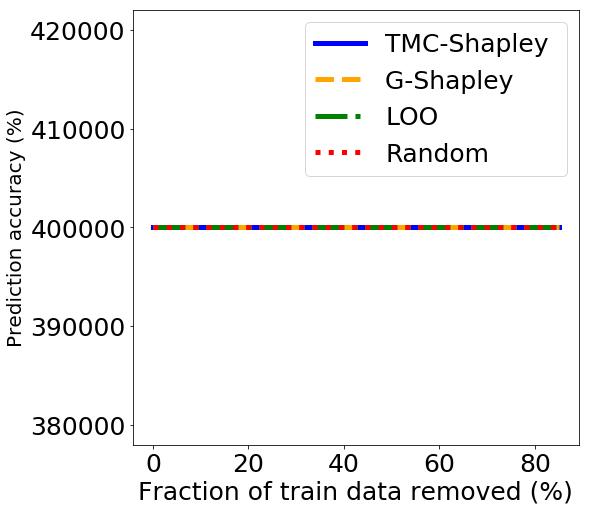

In [68]:
dshap.performance_plots([dshap.vals_tmc, dshap.vals_g, dshap.vals_loo], num_plot_markers=20,
                       sources=dshap.sources)

phiên bản của mình

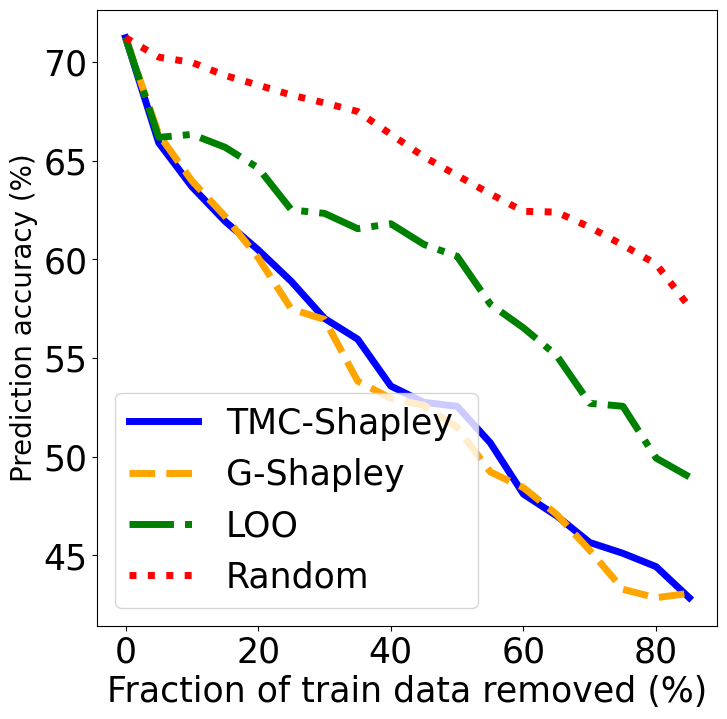

In [17]:
dshap.performance_plots([dshap.vals_tmc, dshap.vals_g, dshap.vals_loo], num_plot_markers=20,
                       sources=dshap.sources)

1000

In [22]:
print(dshap.X_heldout.shape, dshap.y_heldout.shape)
print(dshap.X_test.shape, dshap.y_test.shape)

(4000, 50) (4000,)
(1000, 50) (1000,)


In [5]:
problem, model = 'classification', 'logistic'
hidden_units = [] # Empty list in the case of logistic regression.
train_size = 1000

In [6]:
d, difficulty = 50, 1
num_classes = 2
tol = 0.03
target_accuracy = 0.7
important_dims = 5
clf = return_model(model, solver='liblinear', hidden_units=tuple(hidden_units))
_param = 1.0
for _ in range(100):
    X_raw = np.random.multivariate_normal(mean=np.zeros(d), cov = np.eye(d), 
                                          size=train_size + 5000)
    _, y_raw, _, _ = label_generator(
        problem, X_raw, param = _param,  difficulty = difficulty, important=important_dims)
    clf.fit(X_raw[:train_size], y_raw[:train_size])
    test_acc = clf.score(X_raw[train_size:], y_raw[train_size:])
    if test_acc > target_accuracy:                                                         
        break
    _param *= 1.1
print('Performance using the whole training set = {0:.2f}'.format(test_acc))

Performance using the whole training set = 0.71


In [33]:
X, y = X_raw[:1000], y_raw[:1000]
X_test, y_test = X_raw[1000:], y_raw[1000:]
model = 'logistic'
problem = 'classification'
num_test = 1000
directory = './temp'
dshap = DShap(X, y, X_test, y_test, num_test, model_family=model, metric='accuracy',
              directory=directory, seed=1, overwrite=True)
dshap.run(100, 0.1)

1
2
sources LOO: {0: array([0]), 1: array([1]), 2: array([2]), 3: array([3]), 4: array([4]), 5: array([5]), 6: array([6]), 7: array([7]), 8: array([8]), 9: array([9]), 10: array([10]), 11: array([11]), 12: array([12]), 13: array([13]), 14: array([14]), 15: array([15]), 16: array([16]), 17: array([17]), 18: array([18]), 19: array([19]), 20: array([20]), 21: array([21]), 22: array([22]), 23: array([23]), 24: array([24]), 25: array([25]), 26: array([26]), 27: array([27]), 28: array([28]), 29: array([29]), 30: array([30]), 31: array([31]), 32: array([32]), 33: array([33]), 34: array([34]), 35: array([35]), 36: array([36]), 37: array([37]), 38: array([38]), 39: array([39]), 40: array([40]), 41: array([41]), 42: array([42]), 43: array([43]), 44: array([44]), 45: array([45]), 46: array([46]), 47: array([47]), 48: array([48]), 49: array([49]), 50: array([50]), 51: array([51]), 52: array([52]), 53: array([53]), 54: array([54]), 55: array([55]), 56: array([56]), 57: array([57]), 58: array([58]),

In [34]:
print(dshap.vals_tmc.shape)
print(X_raw.shape)
print(X.shape)

(1000,)
(6000, 50)
(1000, 50)


In [40]:
dshap.performance_plots([dshap.vals_tmc, dshap.vals_g,    dshap.vals_loo], name='plot_1000', num_plot_markers=20,
                       sources=dshap.sources)

d:\DataShapley\DSap1.py:60: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if self.model_family is 'logistic':


3


# data imbalance

In [6]:
print(type(X_raw))

<class 'numpy.ndarray'>


In [43]:
# Đếm số lượng số 0
num_zeros = np.sum(y_raw == 0)

# Đếm số lượng số 1
num_ones = np.sum(y_raw == 1)

In [44]:
print(num_zeros)
print(num_ones)

3014
2986


In [8]:
# Đếm số lượng số 0
num_zeros = np.sum(y == 0)

# Đếm số lượng số 1
num_ones = np.sum(y == 1)
print(num_zeros)
print(num_ones)

503
497


In [7]:
X, y = X_raw[:1000], y_raw[:1000]
X_test, y_test = X_raw[1000:], y_raw[1000:]
model = 'logistic'
problem = 'classification'
num_test = 1000
directory = './temp'

In [8]:
total_zeros = np.sum(y_raw == 0)
total_ones = np.sum(y_raw == 1)
train_zeros = np.sum(y == 0)
train_ones = np.sum(y == 1)
desired_ones = train_zeros // 5
print(desired_ones)
if desired_ones > train_ones:
    desired_ones = train_ones
idx_zeros = np.where(y == 0)[0]
idx_ones = np.where(y == 1)[0]
np.random.shuffle(idx_ones)
train_idx_ones = idx_ones[:desired_ones]
train_idx_zeros = idx_zeros
train_idx = np.concatenate((train_idx_zeros, train_idx_ones))
x_train = X[train_idx]
y_train = y[train_idx]
# Tạo lại tập kiểm tra sao cho cân bằng
remaining_idx = np.setdiff1d(np.arange(len(y_raw)), train_idx)
x_remaining = X_raw[remaining_idx]
y_remaining = y_raw[remaining_idx]
remaining_zeros = np.sum(y_remaining == 0)
remaining_ones = np.sum(y_remaining == 1)
print('data point con lai:', remaining_ones, remaining_zeros)
num_balanced = min(remaining_zeros, remaining_ones)
remaining_idx_zeros = np.where(y_remaining == 0)[0]
remaining_idx_ones = np.where(y_remaining == 1)[0]

np.random.shuffle(remaining_idx_zeros)
np.random.shuffle(remaining_idx_ones)
test_idx_zeros = remaining_idx_zeros[:num_balanced]
test_idx_ones = remaining_idx_ones[:num_balanced]
# Kết hợp lại thành chỉ số tập kiểm tra mới
test_idx = np.concatenate((test_idx_zeros, test_idx_ones))

# Cập nhật tập kiểm tra mới
x_test = x_remaining[test_idx]
y_test = y_remaining[test_idx]
# Kiểm tra tỷ lệ cuối cùng
final_train_zeros = np.sum(y_train == 0)
final_train_ones = np.sum(y_train == 1)
final_test_zeros = np.sum(y_test == 0)
final_test_ones = np.sum(y_test == 1)

print(f'Tập huấn luyện mới có {final_train_zeros} số 0 và {final_train_ones} số 1')
print(f'Tập kiểm tra mới có {final_test_zeros} số 0 và {final_test_ones} số 1')

99
data point con lai: 2979 2427
Tập huấn luyện mới có 495 số 0 và 99 số 1
Tập kiểm tra mới có 2427 số 0 và 2427 số 1


In [9]:
model = 'logistic'
problem = 'classification'
num_test = 1000
directory = './temp'
dshap = DShap(x_train, y_train, x_test, y_test, num_test, model_family=model, metric='accuracy',
              directory=directory, seed=1, overwrite=True)
dshap.run(100, 0.1)

1
2
sources LOO: {0: array([0]), 1: array([1]), 2: array([2]), 3: array([3]), 4: array([4]), 5: array([5]), 6: array([6]), 7: array([7]), 8: array([8]), 9: array([9]), 10: array([10]), 11: array([11]), 12: array([12]), 13: array([13]), 14: array([14]), 15: array([15]), 16: array([16]), 17: array([17]), 18: array([18]), 19: array([19]), 20: array([20]), 21: array([21]), 22: array([22]), 23: array([23]), 24: array([24]), 25: array([25]), 26: array([26]), 27: array([27]), 28: array([28]), 29: array([29]), 30: array([30]), 31: array([31]), 32: array([32]), 33: array([33]), 34: array([34]), 35: array([35]), 36: array([36]), 37: array([37]), 38: array([38]), 39: array([39]), 40: array([40]), 41: array([41]), 42: array([42]), 43: array([43]), 44: array([44]), 45: array([45]), 46: array([46]), 47: array([47]), 48: array([48]), 49: array([49]), 50: array([50]), 51: array([51]), 52: array([52]), 53: array([53]), 54: array([54]), 55: array([55]), 56: array([56]), 57: array([57]), 58: array([58]),

In [54]:
print(dshap.vals_tmc.shape)
print(X_raw.shape)
print(X.shape)

(615,)
(6000, 50)
(1000, 50)


In [55]:
dshap.performance_plots([dshap.vals_tmc, dshap.vals_g,    dshap.vals_loo], name='plot_615', num_plot_markers=20,
                       sources=dshap.sources)

3


In [10]:
total_zeros = np.sum(y_raw == 0)
total_ones = np.sum(y_raw == 1)
train_zeros = np.sum(y == 0)
train_ones = np.sum(y == 1)
desired_ones = train_ones // 5 * 3
desired_zeros = train_zeros // 5 * 3
print(desired_ones, desired_zeros)
idx_zeros = np.where(y == 0)[0]
idx_ones = np.where(y == 1)[0]
np.random.shuffle(idx_ones)
train_idx_ones = idx_ones[:desired_ones]
np.random.shuffle(idx_zeros)
train_idx_zeros = idx_zeros[:desired_zeros]
train_idx = np.concatenate((train_idx_zeros, train_idx_ones))
x_train = X[train_idx]
y_train = y[train_idx]
# Tạo lại tập kiểm tra sao cho cân bằng
remaining_idx = np.setdiff1d(np.arange(len(y_raw)), train_idx)
x_remaining = X_raw[remaining_idx]
y_remaining = y_raw[remaining_idx]
remaining_zeros = np.sum(y_remaining == 0)
remaining_ones = np.sum(y_remaining == 1)
print('data point con lai:', remaining_ones, remaining_zeros)
num_balanced = min(remaining_zeros, remaining_ones, 2500)
remaining_idx_zeros = np.where(y_remaining == 0)[0]
remaining_idx_ones = np.where(y_remaining == 1)[0]

np.random.shuffle(remaining_idx_zeros)
np.random.shuffle(remaining_idx_ones)
test_idx_zeros = remaining_idx_zeros[:num_balanced]
test_idx_ones = remaining_idx_ones[:num_balanced]
# Kết hợp lại thành chỉ số tập kiểm tra mới
test_idx = np.concatenate((test_idx_zeros, test_idx_ones))

# Cập nhật tập kiểm tra mới
x_test = x_remaining[test_idx]
y_test = y_remaining[test_idx]
# Kiểm tra tỷ lệ cuối cùng
final_train_zeros = np.sum(y_train == 0)
final_train_ones = np.sum(y_train == 1)
final_test_zeros = np.sum(y_test == 0)
final_test_ones = np.sum(y_test == 1)

print(f'Tập huấn luyện mới có {final_train_zeros} số 0 và {final_train_ones} số 1')
print(f'Tập kiểm tra mới có {final_test_zeros} số 0 và {final_test_ones} số 1')

297 300
data point con lai: 2277 2226
Tập huấn luyện mới có 300 số 0 và 297 số 1
Tập kiểm tra mới có 2226 số 0 và 2226 số 1


In [57]:
model = 'logistic'
problem = 'classification'
num_test = 1000
directory = './temp'
dshap = DShap(x_train, y_train, x_test, y_test, num_test, model_family=model, metric='accuracy',
              directory=directory, seed=1, overwrite=True)
dshap.run(100, 0.1)

1
2
sources LOO: {0: array([0]), 1: array([1]), 2: array([2]), 3: array([3]), 4: array([4]), 5: array([5]), 6: array([6]), 7: array([7]), 8: array([8]), 9: array([9]), 10: array([10]), 11: array([11]), 12: array([12]), 13: array([13]), 14: array([14]), 15: array([15]), 16: array([16]), 17: array([17]), 18: array([18]), 19: array([19]), 20: array([20]), 21: array([21]), 22: array([22]), 23: array([23]), 24: array([24]), 25: array([25]), 26: array([26]), 27: array([27]), 28: array([28]), 29: array([29]), 30: array([30]), 31: array([31]), 32: array([32]), 33: array([33]), 34: array([34]), 35: array([35]), 36: array([36]), 37: array([37]), 38: array([38]), 39: array([39]), 40: array([40]), 41: array([41]), 42: array([42]), 43: array([43]), 44: array([44]), 45: array([45]), 46: array([46]), 47: array([47]), 48: array([48]), 49: array([49]), 50: array([50]), 51: array([51]), 52: array([52]), 53: array([53]), 54: array([54]), 55: array([55]), 56: array([56]), 57: array([57]), 58: array([58]),

In [58]:
dshap.performance_plots([dshap.vals_tmc, dshap.vals_g,    dshap.vals_loo], name='plot_balance', num_plot_markers=20,
                       sources=dshap.sources)

3


# label poison

In [9]:
def add_label_noise(x_train, y_train, num_classes, shuffle_per):
    """
    Thêm label noise vào tập huấn luyện theo tỷ lệ `shuffle_per`.

    Args:
        x_train (np.ndarray): Dữ liệu huấn luyện.
        y_train (np.ndarray): Nhãn của dữ liệu huấn luyện.
        num_classes (int): Số lượng lớp (nhãn).
        shuffle_per (float): Tỷ lệ phần trăm mẫu cần thay đổi nhãn.

    Returns:
        np.ndarray, np.ndarray: Dữ liệu huấn luyện và nhãn sau khi thêm label noise.
    """
    # Xác định số lượng mẫu cần trộn (poison)
    total_shuffles = int(shuffle_per * len(y_train))
    
    # Chọn ngẫu nhiên các chỉ số của tập huấn luyện để thay đổi nhãn
    shuffle_inds = np.random.choice(len(y_train), size=total_shuffles, replace=False)
    noise_mask = np.zeros(len(y_train), dtype=int)
    # Thay đổi nhãn của các mẫu được chọn một cách ngẫu nhiên
    for index in shuffle_inds:
        cur_label = y_train[index]
        new_label = np.random.randint(num_classes)
        while new_label == cur_label:
            new_label = np.random.randint(num_classes)
        y_train[index] = new_label
        noise_mask[index] = 1
    return x_train, y_train, noise_mask

# Giả sử x_train và y_train đã được định nghĩa từ trước
# Ví dụ sử dụng:
num_classes = len(set(y_train))  # Số lượng lớp (nhãn)
shuffle_per = 0.1  # Tỷ lệ phần trăm mẫu cần thay đổi nhãn
cur_x, cur_y = x_train.copy(), y_train.copy()
x_train_noisy, y_train_noisy, noise_mask = add_label_noise(cur_x, cur_y, num_classes, shuffle_per)

# Kiểm tra kết quả
print(f'Trước khi thêm label noise: {np.bincount(y_train)}')
print(f'Sau khi thêm label noise: {np.bincount(y_train_noisy)}')
print(f'Mảng đánh dấu nhiễu: {np.bincount(noise_mask)}')

Trước khi thêm label noise: [495  99]
Sau khi thêm label noise: [456 138]
Mảng đánh dấu nhiễu: [535  59]


In [14]:
final_train_zeros = np.sum(y_train == 0)
final_train_ones = np.sum(y_train == 1)

print(final_train_zeros)

326


In [17]:
model = 'logistic'
problem = 'classification'
num_test = 1000
directory = './temp'
dshap = DShap(x_train_noisy, y_train_noisy, x_test, y_test, num_test, model_family=model, metric='accuracy',
              directory=directory, seed=1, overwrite=True)
dshap.run(100, 0.1)

1
2
sources LOO: {0: array([0]), 1: array([1]), 2: array([2]), 3: array([3]), 4: array([4]), 5: array([5]), 6: array([6]), 7: array([7]), 8: array([8]), 9: array([9]), 10: array([10]), 11: array([11]), 12: array([12]), 13: array([13]), 14: array([14]), 15: array([15]), 16: array([16]), 17: array([17]), 18: array([18]), 19: array([19]), 20: array([20]), 21: array([21]), 22: array([22]), 23: array([23]), 24: array([24]), 25: array([25]), 26: array([26]), 27: array([27]), 28: array([28]), 29: array([29]), 30: array([30]), 31: array([31]), 32: array([32]), 33: array([33]), 34: array([34]), 35: array([35]), 36: array([36]), 37: array([37]), 38: array([38]), 39: array([39]), 40: array([40]), 41: array([41]), 42: array([42]), 43: array([43]), 44: array([44]), 45: array([45]), 46: array([46]), 47: array([47]), 48: array([48]), 49: array([49]), 50: array([50]), 51: array([51]), 52: array([52]), 53: array([53]), 54: array([54]), 55: array([55]), 56: array([56]), 57: array([57]), 58: array([58]),

In [14]:
model = 'logistic'
problem = 'classification'
num_test = 1000
directory = './temp'
dshap = DShap(x_train_noisy, y_train_noisy, x_test, y_test, num_test, model_family=model, metric='accuracy',
              directory=directory, seed=1, overwrite = True)
dshap.run(100, 0.1)

1
2
sources LOO: {0: array([0]), 1: array([1]), 2: array([2]), 3: array([3]), 4: array([4]), 5: array([5]), 6: array([6]), 7: array([7]), 8: array([8]), 9: array([9]), 10: array([10]), 11: array([11]), 12: array([12]), 13: array([13]), 14: array([14]), 15: array([15]), 16: array([16]), 17: array([17]), 18: array([18]), 19: array([19]), 20: array([20]), 21: array([21]), 22: array([22]), 23: array([23]), 24: array([24]), 25: array([25]), 26: array([26]), 27: array([27]), 28: array([28]), 29: array([29]), 30: array([30]), 31: array([31]), 32: array([32]), 33: array([33]), 34: array([34]), 35: array([35]), 36: array([36]), 37: array([37]), 38: array([38]), 39: array([39]), 40: array([40]), 41: array([41]), 42: array([42]), 43: array([43]), 44: array([44]), 45: array([45]), 46: array([46]), 47: array([47]), 48: array([48]), 49: array([49]), 50: array([50]), 51: array([51]), 52: array([52]), 53: array([53]), 54: array([54]), 55: array([55]), 56: array([56]), 57: array([57]), 58: array([58]),

In [1]:
dshap.performance_plots([dshap.vals_tmc, dshap.vals_g,    dshap.vals_loo], name='plot_balance_noise', num_plot_markers=20,
                       sources=dshap.sources)

NameError: name 'dshap' is not defined

In [51]:
len(set(y_test))

2

In [12]:
len(set(y_train))

2

In [7]:
import matplotlib.pyplot as plt

In [25]:
dshap.performance_plots_poison([dshap.vals_tmc, dshap.vals_g,    dshap.vals_loo], name='plot_imbalance_noise', num_plot_markers=20,
                       sources=dshap.sources, noise_mask= noise_mask)

d:\DataShapley\DSap1.py:61: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if self.model_family is 'logistic':


(597,)
[517 437 524 577 374  96 136 109 193 545 203 169 571 531 453 533 191 275
 439 457 339 204 302 344  49 532 189 173 319  86 278 304 200 498 521 338
  27 413 534 547 183 455 540 316 358   4 249 371  78 106 465  91 588 488
 389 476 257 415 450 197 562 482  79 370  56 222 468 400 503  20 438 220
 172 187  99 419 101 112 411  28 163  92  39 321 499 590 404 293 408 448
 139 421 366 291  97 417 167 233 300  42 281 444 393 402 440 384 224  45
 175 240 523 449 229 428 361  41 394 320  81 386 298 186 217  19 205 343
 132 470 264  43 355 214 566 277 553 269 460 312 182  13 462 327 115 334
 535 211 228 157 314 518 392 290 145  53 313 184 299 492 258 323  52 563
  11  65  22 129 375 289 185 331 144 378 271 114 377 431 309 107 176 493
 260  77 268 475 108 410  64 168 303 403 496 282 328 395 195 226 283 354
 267 111 397 311  16 254  62 506 380 156  55 237 266 232 158 194 458 251
 360  70 141 539 352 146 117 133  50 131 491 243 346 401 201 134 551 250
   9 218  73 489  54 591 259 477 125 286 362

In [18]:
print(noise_mask.shape)
print(noise_mask)

(597,)
[0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 1 1 0 0
 1 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0
 0 1 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 1 1 0 0 0 1 0 1 0
 1 0 0 1 0 0 1 1 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 1 0
 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0
 1 1 1 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0
 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1
 1 0 1 1 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 1
 0 0 0 0 0 0 1 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 1 1 1 0
 1 1 0 0 1 0 1 0 0 1 1 1 0 1 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 1 1 0 0
 0 0 1 0 0 0 0 1 0

In [70]:
print(dshap.vals_tmc.shape)

(597,)


# sample weighted

In [15]:
print(f'Trước khi thêm label noise: {np.bincount(y_train)}')
print(f'Sau khi thêm label noise: {np.bincount(y_train_noisy)}')
print(f'Mảng đánh dấu nhiễu: {np.bincount(noise_mask)}')

Trước khi thêm label noise: [496  99]
Sau khi thêm label noise: [453 142]
Mảng đánh dấu nhiễu: [536  59]


In [23]:
print(f'Test: {np.bincount(dshap.y_test)}')
print(f'Heldout: {np.bincount(dshap.y_heldout)}')


Test: [508 492]
Heldout: [1559 1575]


0.1 noise

In [16]:
model = 'logistic'
problem = 'classification'
num_test = 1000
directory = './temp'
#sample_weights = [1 if y == 0 else 1 for y in y_train]
dshap = DShap(x_train, y_train, x_test, y_test, num_test, model_family=model, metric='accuracy',
                directory=directory, seed=1, overwrite=True)
dshap.run(100, 0.1)

1
2
sources LOO: {0: array([0]), 1: array([1]), 2: array([2]), 3: array([3]), 4: array([4]), 5: array([5]), 6: array([6]), 7: array([7]), 8: array([8]), 9: array([9]), 10: array([10]), 11: array([11]), 12: array([12]), 13: array([13]), 14: array([14]), 15: array([15]), 16: array([16]), 17: array([17]), 18: array([18]), 19: array([19]), 20: array([20]), 21: array([21]), 22: array([22]), 23: array([23]), 24: array([24]), 25: array([25]), 26: array([26]), 27: array([27]), 28: array([28]), 29: array([29]), 30: array([30]), 31: array([31]), 32: array([32]), 33: array([33]), 34: array([34]), 35: array([35]), 36: array([36]), 37: array([37]), 38: array([38]), 39: array([39]), 40: array([40]), 41: array([41]), 42: array([42]), 43: array([43]), 44: array([44]), 45: array([45]), 46: array([46]), 47: array([47]), 48: array([48]), 49: array([49]), 50: array([50]), 51: array([51]), 52: array([52]), 53: array([53]), 54: array([54]), 55: array([55]), 56: array([56]), 57: array([57]), 58: array([58]),

0.1 noise, weight 1:3

In [24]:
model = 'logistic'
problem = 'classification'
num_test = 1000
directory = './temp'
sample_weights = [1 if y == 0 else 3 for y in y_train]
dshap = DShap(x_train, y_train, x_test, y_test, num_test, model_family=model, metric='accuracy',
              sample_weight = sample_weights, directory=directory, seed=1, overwrite=True)
dshap.run(100, 0.1)

d:\DataShapley\DSap1.py:108: UserWarning: Sample weight not implemented for G-Shapley
  warnings.warn("Sample weight not implemented for G-Shapley")


1
2
sources LOO: {0: array([0]), 1: array([1]), 2: array([2]), 3: array([3]), 4: array([4]), 5: array([5]), 6: array([6]), 7: array([7]), 8: array([8]), 9: array([9]), 10: array([10]), 11: array([11]), 12: array([12]), 13: array([13]), 14: array([14]), 15: array([15]), 16: array([16]), 17: array([17]), 18: array([18]), 19: array([19]), 20: array([20]), 21: array([21]), 22: array([22]), 23: array([23]), 24: array([24]), 25: array([25]), 26: array([26]), 27: array([27]), 28: array([28]), 29: array([29]), 30: array([30]), 31: array([31]), 32: array([32]), 33: array([33]), 34: array([34]), 35: array([35]), 36: array([36]), 37: array([37]), 38: array([38]), 39: array([39]), 40: array([40]), 41: array([41]), 42: array([42]), 43: array([43]), 44: array([44]), 45: array([45]), 46: array([46]), 47: array([47]), 48: array([48]), 49: array([49]), 50: array([50]), 51: array([51]), 52: array([52]), 53: array([53]), 54: array([54]), 55: array([55]), 56: array([56]), 57: array([57]), 58: array([58]),

In [8]:
model = 'logistic'
problem = 'classification'
num_test = 1000
directory = './temp'
#sample_weights = [1 if y == 0 else 1 for y in y_train]
dshap = DShap(x_train, y_train, x_test, y_test, num_test, model_family=model, metric='accuracy',
                directory=directory, seed=1, overwrite=True)
dshap.run(100, 0.1)

1
2
sources LOO: {0: array([0]), 1: array([1]), 2: array([2]), 3: array([3]), 4: array([4]), 5: array([5]), 6: array([6]), 7: array([7]), 8: array([8]), 9: array([9]), 10: array([10]), 11: array([11]), 12: array([12]), 13: array([13]), 14: array([14]), 15: array([15]), 16: array([16]), 17: array([17]), 18: array([18]), 19: array([19]), 20: array([20]), 21: array([21]), 22: array([22]), 23: array([23]), 24: array([24]), 25: array([25]), 26: array([26]), 27: array([27]), 28: array([28]), 29: array([29]), 30: array([30]), 31: array([31]), 32: array([32]), 33: array([33]), 34: array([34]), 35: array([35]), 36: array([36]), 37: array([37]), 38: array([38]), 39: array([39]), 40: array([40]), 41: array([41]), 42: array([42]), 43: array([43]), 44: array([44]), 45: array([45]), 46: array([46]), 47: array([47]), 48: array([48]), 49: array([49]), 50: array([50]), 51: array([51]), 52: array([52]), 53: array([53]), 54: array([54]), 55: array([55]), 56: array([56]), 57: array([57]), 58: array([58]),

In [19]:
model = 'logistic'
problem = 'classification'
num_test = 1000
directory = './temp'
sample_weights = [1 if y == 0 else 1 for y in y_train]
dshap = DShap(x_train, y_train, x_test, y_test, num_test, model_family=model, metric='accuracy',
              sample_weight = sample_weights, directory=directory, seed=1, overwrite=True)
dshap.run(100, 0.1)

d:\DataShapley\DSap1.py:61: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if self.model_family is 'logistic':
d:\DataShapley\DSap1.py:108: UserWarning: Sample weight not implemented for G-Shapley
  warnings.warn("Sample weight not implemented for G-Shapley")


1
2
sources LOO: {0: array([0]), 1: array([1]), 2: array([2]), 3: array([3]), 4: array([4]), 5: array([5]), 6: array([6]), 7: array([7]), 8: array([8]), 9: array([9]), 10: array([10]), 11: array([11]), 12: array([12]), 13: array([13]), 14: array([14]), 15: array([15]), 16: array([16]), 17: array([17]), 18: array([18]), 19: array([19]), 20: array([20]), 21: array([21]), 22: array([22]), 23: array([23]), 24: array([24]), 25: array([25]), 26: array([26]), 27: array([27]), 28: array([28]), 29: array([29]), 30: array([30]), 31: array([31]), 32: array([32]), 33: array([33]), 34: array([34]), 35: array([35]), 36: array([36]), 37: array([37]), 38: array([38]), 39: array([39]), 40: array([40]), 41: array([41]), 42: array([42]), 43: array([43]), 44: array([44]), 45: array([45]), 46: array([46]), 47: array([47]), 48: array([48]), 49: array([49]), 50: array([50]), 51: array([51]), 52: array([52]), 53: array([53]), 54: array([54]), 55: array([55]), 56: array([56]), 57: array([57]), 58: array([58]),

In [22]:
model = 'logistic'
problem = 'classification'
num_test = 1000
directory = './temp'
sample_weights = [1 if y == 0 else 1 for y in y_train]
dshap = DShap(x_train, y_train, x_test, y_test, num_test, model_family=model, metric='accuracy',
              sample_weight = sample_weights, directory=directory, seed=1, overwrite=True)
dshap.run(100, 0.1)

d:\DataShapley\DSap1.py:108: UserWarning: Sample weight not implemented for G-Shapley
  warnings.warn("Sample weight not implemented for G-Shapley")


1
2
sources LOO: {0: array([0]), 1: array([1]), 2: array([2]), 3: array([3]), 4: array([4]), 5: array([5]), 6: array([6]), 7: array([7]), 8: array([8]), 9: array([9]), 10: array([10]), 11: array([11]), 12: array([12]), 13: array([13]), 14: array([14]), 15: array([15]), 16: array([16]), 17: array([17]), 18: array([18]), 19: array([19]), 20: array([20]), 21: array([21]), 22: array([22]), 23: array([23]), 24: array([24]), 25: array([25]), 26: array([26]), 27: array([27]), 28: array([28]), 29: array([29]), 30: array([30]), 31: array([31]), 32: array([32]), 33: array([33]), 34: array([34]), 35: array([35]), 36: array([36]), 37: array([37]), 38: array([38]), 39: array([39]), 40: array([40]), 41: array([41]), 42: array([42]), 43: array([43]), 44: array([44]), 45: array([45]), 46: array([46]), 47: array([47]), 48: array([48]), 49: array([49]), 50: array([50]), 51: array([51]), 52: array([52]), 53: array([53]), 54: array([54]), 55: array([55]), 56: array([56]), 57: array([57]), 58: array([58]),

In [23]:
dshap.performance_plots_poison([dshap.vals_tmc, dshap.vals_g,    dshap.vals_loo], name='plot_imbalance_noise_weighted_11', num_plot_markers=20,
                       sources=dshap.sources, noise_mask= noise_mask)

(612,)
[207  17 516 560 126 581 383 357 337 486 178 229  82 304 175 123  94 371
 242 575 112  35 399 296 362 521 250 118 461 569 144 421  16 497 406 409
 104 190 214 339  80 583 166 374 301 150 133 347 470 555 471 391 411 491
 322 423 463 170 194 275 520  93 382 198 508 500  25 105 532 495 350 161
 547 359 279 519  83  14 306 444 327 122 458 568  26  84 243 504 440 254
  42 394 320 473 324 451 218 498 610  64 215 501  15 341 366 467 209 462
 472  21 119 227 124 145 184 408 210 431 321 240 434 307 232 264 389 200
  31 149 404 276 132 142 427 259 443  56 428  52 310  40   9 114 356 294
  19 110 299 163 266  61 424 475 285   0 197 453 274 387 202 360 223  99
 308  57 147 195 369  46  95 151  18 548  98  60 286 543 269 487 162 183
 165 177 185 220 336 108 484 291 206 168 459 512  81  54 460   8 260 414
 351  62 116 412 401 326 480  32 140  53 230 158 482 143 585 228 187  37
 388  87 466 277 117 284 476 245  34 403 345 305 380 545 222 334 309  50
 507 107 364 417 483 239   5 432 503 367 456

In [9]:
dshap.performance_plots_poison([dshap.vals_tmc, dshap.vals_g,    dshap.vals_loo], name='plot_imbalance_noise_weighted_11', num_plot_markers=20,
                       sources=dshap.sources, noise_mask= noise_mask)

(595,)
[155 211 111 263  88 208 323 314 325 410 257 405 415 150 339 560 241 411
 304  92 566 447 167 229   7 275  22 217  84  74 297  57 186 291  27 224
 246  13 124 353 365 570   9 296 320  24 478  37  17 576  89 408 328 114
 321 252  96 239 308 419 295 402 138 345 168 477 344 136 177 482 359  39
 197 253 271 567 262  77 417 249 412 406 383  16  35 433 449 329 221 201
  47 142  29  55 228 428 236 230 145 431 185 294 333  86 298 102  32 130
 376  46 438 432 331 372 487 356  42 416 424 465 464 137  59 158 258  53
 293 409 292  76 163 486  34 397 146  60 300  11 488  69 395  67 195 315
 390 330 592 287  68 364 456 444  91 108 237 496 215 469 403 491  70  98
   5 218 231 473 250 468 346 446  33 455 192 363 435 467 204 112 413 125
  62 462 384  79 216  95  83 116 121 426 238 200 393 434 194 481 423 466
 489 256 302 430 278 117 160 374  93 311 392 265 358 260 427 382 341  10
 166 179 312 157  21 233 205 485 282  54  49 174 175 476 280 407 552 306
 324 255 332 351 203 149 318  80 232  48 389

In [25]:
dshap.performance_plots_poison([dshap.vals_tmc, dshap.vals_g,    dshap.vals_loo], name='plot_imbalance_noise10_weighted_11', num_plot_markers=20,
                       sources=dshap.sources, noise_mask= noise_mask)

(595,)
[155 211 111 263 208 566 560 567 405 323 415  88 325 314 410 570 576  92
  84 447   7 297 241  22 229 167  57  74 304 275 339 217 257 150  24 186
 224  37  13 124   9 296 408  27 138 402 365 320 246 239 478 344 592 291
 328  39 359 411 308 168 252  89 482 321 262  96 419 249 477 406 433 271
 136 504  17 294 177  77  35  47 221 449 230 552 431 142 353 201 197 428
 145  34 383 185 532 424 372 438 192 218 195 258 146 487 356 292 577 376
 465 331 329 298 236  76 416 137 395 300 409  91  42 364  55 130  29 446
 432 444 228 215 467  32  60 413 374 158 253 315  16 390 488 125 200 204
  59 469 486 330 231  86 333 384 403 491  33 412  62 102  68  53  67  98
 464 455 393 489  69 456 250 114  46  11 555 473 462 121 346 293 468 278
 363  93  83  95  48 157 423 427 435 256 237 216   5 434 160 341 311 302
 312 306 240 265  21 351 171 426 332 481 417 140 175 407 430 205 362 163
 116 389 496 358 369  49 194 174  54 225  36 251  80 282 259 233 388 557
  45  70 382  31  15  58 203 166 318 281 255

In [26]:
dshap.performance_plots_inc([dshap.vals_tmc, dshap.vals_g,    dshap.vals_loo], name='plot_increase', num_plot_markers=20,
                       sources=dshap.sources)

TypeError: only integer scalar arrays can be converted to a scalar index

: 

In [ ]:
dshap.performance_plots([dshap.vals_tmc, dshap.vals_g,    dshap.vals_loo], name='plot_imbalance_noise_aaa', num_plot_markers=20,
                       sources=dshap.sources)

3


In [10]:
len(sample_weights)

612

In [21]:
dshap.performance_plots_poison([dshap.vals_tmc, dshap.vals_g,    dshap.vals_loo], name='plot_imbalance_noise_weighted', num_plot_markers=20,
                       sources=dshap.sources, noise_mask= noise_mask)

(612,)
[516 560 207  17 581 126 242 555 583 357 383  82 190 229 175 521 399 371
 337 123 374  94 486 569 112 532 461 214 421 491 304 339 144 362 104 296
 470  80 118 409 166 133 423  35  16 610 547 198 497 250 301 520 411 150
 406 391 170 178 500 575 322 105 512 275  25 254  93 463 582 350 347 218
  14  21  64 568 306 508 382 495 501 194 458 161 444 324 327 122 440 443
 451 471 279 504  42  26 243  15 473 310 124 359 366 119 467 184 341 145
 114 209 472 286 320 431 215 264 142 394 308 200 197 498 434  83 266 404
 132 321 227  31 151 232 519  84 185 475 276  57  52 240 259 223 427 408
 294 548 462 147 162 389 570 149  61  18  19 269   9  34  56 163 466 476
 414 110 183 165 202 108 356 585 401 291 307 274 177 220 228  99 345  95
 245 164  40 424 168 484 369 299 417 260 480 143   5 597 388 351  50  54
 367 487  97 349 412 483  49 441 116  98 206   0 233 158 503  70   7 195
 121  87 456 314 252 187 494 336 222 403 186  37  44 556  60  32 447 360
 482 452 459 380 507 428 285 237 208 230 311

In [20]:
print(noise_mask.shape)
print(noise_mask)

(612,)
[0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0
 0 1 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0
 0 1 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 1 0 0 0 0 1 1 0 0 1 1 0
 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1
 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 0
 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0 1 1 0 0 0
 0 1 0 1 0 0 1 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 0 1
 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0
 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 0 1
 0 0 1 0 0 0 1 1 1 1 0 0 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0
 1 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 1 1 0 0

In [ ]:
print(noise_mask.shape)
print(noise_mask)

# F1-score

In [11]:
model = 'logistic'
problem = 'classification'
num_test = 1000
directory = './temp'
sample_weights = [1 if y == 0 else 3 for y in y_train]
dshap = DShap(x_train, y_train, x_test, y_test, num_test, model_family=model, metric='f1',
              sample_weight = sample_weights, directory=directory, seed=1, overwrite=True)
dshap.run(100, 0.1)

d:\DataShapley\DSap1.py:108: UserWarning: Sample weight not implemented for G-Shapley
  warnings.warn("Sample weight not implemented for G-Shapley")


1
2
sources LOO: {0: array([0]), 1: array([1]), 2: array([2]), 3: array([3]), 4: array([4]), 5: array([5]), 6: array([6]), 7: array([7]), 8: array([8]), 9: array([9]), 10: array([10]), 11: array([11]), 12: array([12]), 13: array([13]), 14: array([14]), 15: array([15]), 16: array([16]), 17: array([17]), 18: array([18]), 19: array([19]), 20: array([20]), 21: array([21]), 22: array([22]), 23: array([23]), 24: array([24]), 25: array([25]), 26: array([26]), 27: array([27]), 28: array([28]), 29: array([29]), 30: array([30]), 31: array([31]), 32: array([32]), 33: array([33]), 34: array([34]), 35: array([35]), 36: array([36]), 37: array([37]), 38: array([38]), 39: array([39]), 40: array([40]), 41: array([41]), 42: array([42]), 43: array([43]), 44: array([44]), 45: array([45]), 46: array([46]), 47: array([47]), 48: array([48]), 49: array([49]), 50: array([50]), 51: array([51]), 52: array([52]), 53: array([53]), 54: array([54]), 55: array([55]), 56: array([56]), 57: array([57]), 58: array([58]),

KeyboardInterrupt: 

In [32]:
model = 'logistic'
problem = 'classification'
num_test = 1000
directory = './temp'
sample_weights = [1 if y == 0 else 3 for y in y_train]
dshap = DShap(x_train, y_train, x_test, y_test, num_test, model_family=model, metric='f1',
              sample_weight = sample_weights, directory=directory, seed=1, overwrite=True)
dshap.run(100, 0.1)

d:\DataShapley\DSap1.py:61: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if self.model_family is 'logistic':
d:\DataShapley\DSap1.py:108: UserWarning: Sample weight not implemented for G-Shapley
  warnings.warn("Sample weight not implemented for G-Shapley")


1
2
sources LOO: {0: array([0]), 1: array([1]), 2: array([2]), 3: array([3]), 4: array([4]), 5: array([5]), 6: array([6]), 7: array([7]), 8: array([8]), 9: array([9]), 10: array([10]), 11: array([11]), 12: array([12]), 13: array([13]), 14: array([14]), 15: array([15]), 16: array([16]), 17: array([17]), 18: array([18]), 19: array([19]), 20: array([20]), 21: array([21]), 22: array([22]), 23: array([23]), 24: array([24]), 25: array([25]), 26: array([26]), 27: array([27]), 28: array([28]), 29: array([29]), 30: array([30]), 31: array([31]), 32: array([32]), 33: array([33]), 34: array([34]), 35: array([35]), 36: array([36]), 37: array([37]), 38: array([38]), 39: array([39]), 40: array([40]), 41: array([41]), 42: array([42]), 43: array([43]), 44: array([44]), 45: array([45]), 46: array([46]), 47: array([47]), 48: array([48]), 49: array([49]), 50: array([50]), 51: array([51]), 52: array([52]), 53: array([53]), 54: array([54]), 55: array([55]), 56: array([56]), 57: array([57]), 58: array([58]),

In [34]:
print('tmc, g, loo:',dshap.vals_tmc.shape, dshap.vals_loo.shape)

tmc, g, loo: (594,) (594,)


In [12]:
print('tmc, g, loo:',dshap.vals_tmc.shape, dshap.vals_g.shape, dshap.vals_loo.shape)

tmc, g, loo: (594,) (594,) (594,)


In [27]:
print(type(sample_weights))

<class 'list'>


In [26]:
y_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [31]:
dshap.performance_plots_poison([dshap.vals_tmc, dshap.vals_g,    dshap.vals_loo], name='plot_imbalance_noise10_weighted_11', num_plot_markers=20,
                       sources=dshap.sources, noise_mask= noise_mask)

(594,)
[394 280 133 194 128 421 505 266  15 377 148 284 493 274  56 314 278 337
 161 260 247  86 121 444 275 288 358  18 480 254 325 269 376 331 429 178
 313 420 227 263 405 467 564 587 411 483 188  26 320 407 171  37 255  21
 387 361 559 165  75 174 256 118 515 482 221 435  30 198 543 277 208  98
 472 442 456 217 150 186   5  23 401 285 206 373 344   0 489   7 487 294
 403 356 126 315 239 418 375 297 235 166 436  20  91 574 469 252 158 439
  66  52 460 230  63 265  31 363 346 172 199 490 308 328  10 349  40 433
 151 440 389 385 181 170 143 390 207  84 258  22 218 299 321 205 498 137
 160 179 454 234 107  83 138  87 129 182 214 149 311 312 338  46 209 114
 267 168 180 351 169 382 144  76 301 163  62 245 243 253 251  51 124 200
 406 139 322 176 488 305 340 213 457  67 514 290 262 438 465 268  61  69
 466 185 477 339  78 400 116 109  55 441 397 485 309  34 173 212 364 222
  80 100  17 453  39  54 162  59 175 291 451 220 479 445 142  72 396 270
 415 461  88 102 177 196 383 419 570 350  48

In [30]:
dshap.performance_plots([dshap.vals_tmc, dshap.vals_g,    dshap.vals_loo], name='plot_imbalance_noise_aaa', num_plot_markers=20,
                       sources=dshap.sources)

{0: array([0]), 1: array([1]), 2: array([2]), 3: array([3]), 4: array([4]), 5: array([5]), 6: array([6]), 7: array([7]), 8: array([8]), 9: array([9]), 10: array([10]), 11: array([11]), 12: array([12]), 13: array([13]), 14: array([14]), 15: array([15]), 16: array([16]), 17: array([17]), 18: array([18]), 19: array([19]), 20: array([20]), 21: array([21]), 22: array([22]), 23: array([23]), 24: array([24]), 25: array([25]), 26: array([26]), 27: array([27]), 28: array([28]), 29: array([29]), 30: array([30]), 31: array([31]), 32: array([32]), 33: array([33]), 34: array([34]), 35: array([35]), 36: array([36]), 37: array([37]), 38: array([38]), 39: array([39]), 40: array([40]), 41: array([41]), 42: array([42]), 43: array([43]), 44: array([44]), 45: array([45]), 46: array([46]), 47: array([47]), 48: array([48]), 49: array([49]), 50: array([50]), 51: array([51]), 52: array([52]), 53: array([53]), 54: array([54]), 55: array([55]), 56: array([56]), 57: array([57]), 58: array([58]), 59: array([59]),

In [29]:
dshap.performance_plots_inc([dshap.vals_tmc, dshap.vals_g,    dshap.vals_loo], name='plot_increase', num_plot_markers=20,
                       sources=dshap.sources)

d:\DataShapley\DSap1.py:61: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if self.model_family is 'logistic':


{0: array([0]), 1: array([1]), 2: array([2]), 3: array([3]), 4: array([4]), 5: array([5]), 6: array([6]), 7: array([7]), 8: array([8]), 9: array([9]), 10: array([10]), 11: array([11]), 12: array([12]), 13: array([13]), 14: array([14]), 15: array([15]), 16: array([16]), 17: array([17]), 18: array([18]), 19: array([19]), 20: array([20]), 21: array([21]), 22: array([22]), 23: array([23]), 24: array([24]), 25: array([25]), 26: array([26]), 27: array([27]), 28: array([28]), 29: array([29]), 30: array([30]), 31: array([31]), 32: array([32]), 33: array([33]), 34: array([34]), 35: array([35]), 36: array([36]), 37: array([37]), 38: array([38]), 39: array([39]), 40: array([40]), 41: array([41]), 42: array([42]), 43: array([43]), 44: array([44]), 45: array([45]), 46: array([46]), 47: array([47]), 48: array([48]), 49: array([49]), 50: array([50]), 51: array([51]), 52: array([52]), 53: array([53]), 54: array([54]), 55: array([55]), 56: array([56]), 57: array([57]), 58: array([58]), 59: array([59]),

In [38]:
dshap.merge_results()

./temp\mem_tmc_0000.pkl
./temp\mem_g_0000.pkl


In [39]:
convergence_plots(dshap.marginals_tmc)

In [35]:
dshap.performance_plots_poison([dshap.vals_tmc, dshap.vals_tmc,    dshap.vals_loo], name='plot_imbalance_noise10_weighted_11', num_plot_markers=20,
                       sources=dshap.sources, noise_mask= noise_mask)

(594,)
[128 133 421 394 247 194 284 288 361 420 260  56 266 280 121 275 148 278
 337 274  18  15 227 505 377 161 269 263 254 405  30 559 429 217 493  86
 313 331  21 320 480 483 239 564 314 178 325 469 255 376 358 256  26 198
 407 294 482 389 188   7 487 221 235  75  63 444 490  37 460 170 171 158
 165   5 206 299 543 149 411 373 230 208 436 467 285 435 349 118  98 309
 454  91 174  22 489 442  66 262 277 574 587  20 172 375 363  84 440  23
 129  52 438  31 401 387 297 470 356 433 182 150 144  55 143 267 160  62
 181  67 472 163 252  10 351  72 315  85   0  40 151 456 340 200 465 488
 207 324 439 265 301  87 396  47 214  83 308  46 385 116  95 410 364 390
 185 397 293 142 321 218 500  34  69 311 514 466 180 328  76 393 102 226
 258 406 457 334  88 344 486 209 312 403 126 173  39 210 100 322 268 168
 199 338 382 175 205 145 245 388 445 213 341 166 109 137 138  48  93 110
 418 253  17 479 257 222 125 485 234 243 281 360  90 371 352 270 186  96
  51 339 167 374 318 306 114 261 187 453 384

In [36]:
dshap.performance_plots_inc([dshap.vals_tmc, dshap.vals_tmc,    dshap.vals_loo], name='plot_increase', num_plot_markers=20,
                       sources=dshap.sources)

{0: array([0]), 1: array([1]), 2: array([2]), 3: array([3]), 4: array([4]), 5: array([5]), 6: array([6]), 7: array([7]), 8: array([8]), 9: array([9]), 10: array([10]), 11: array([11]), 12: array([12]), 13: array([13]), 14: array([14]), 15: array([15]), 16: array([16]), 17: array([17]), 18: array([18]), 19: array([19]), 20: array([20]), 21: array([21]), 22: array([22]), 23: array([23]), 24: array([24]), 25: array([25]), 26: array([26]), 27: array([27]), 28: array([28]), 29: array([29]), 30: array([30]), 31: array([31]), 32: array([32]), 33: array([33]), 34: array([34]), 35: array([35]), 36: array([36]), 37: array([37]), 38: array([38]), 39: array([39]), 40: array([40]), 41: array([41]), 42: array([42]), 43: array([43]), 44: array([44]), 45: array([45]), 46: array([46]), 47: array([47]), 48: array([48]), 49: array([49]), 50: array([50]), 51: array([51]), 52: array([52]), 53: array([53]), 54: array([54]), 55: array([55]), 56: array([56]), 57: array([57]), 58: array([58]), 59: array([59]),

In [37]:
dshap.performance_plots([dshap.vals_tmc, dshap.vals_tmc,    dshap.vals_loo], name='plot_imbalance_noise_aaa', num_plot_markers=20,
                       sources=dshap.sources)

{0: array([0]), 1: array([1]), 2: array([2]), 3: array([3]), 4: array([4]), 5: array([5]), 6: array([6]), 7: array([7]), 8: array([8]), 9: array([9]), 10: array([10]), 11: array([11]), 12: array([12]), 13: array([13]), 14: array([14]), 15: array([15]), 16: array([16]), 17: array([17]), 18: array([18]), 19: array([19]), 20: array([20]), 21: array([21]), 22: array([22]), 23: array([23]), 24: array([24]), 25: array([25]), 26: array([26]), 27: array([27]), 28: array([28]), 29: array([29]), 30: array([30]), 31: array([31]), 32: array([32]), 33: array([33]), 34: array([34]), 35: array([35]), 36: array([36]), 37: array([37]), 38: array([38]), 39: array([39]), 40: array([40]), 41: array([41]), 42: array([42]), 43: array([43]), 44: array([44]), 45: array([45]), 46: array([46]), 47: array([47]), 48: array([48]), 49: array([49]), 50: array([50]), 51: array([51]), 52: array([52]), 53: array([53]), 54: array([54]), 55: array([55]), 56: array([56]), 57: array([57]), 58: array([58]), 59: array([59]),